In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)



Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dbname = 'combined_profiling'
username = 'along528'
pswd = 'password'
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [3]:
data = pd.read_sql('SELECT * FROM traffic_joined_with_features',con)
data = data[data['state']!='NC']
data = data[data['city']!='Chicago']

data

,index,surveyid,agency,city,state,zipcode,stops_total,searches_total,hits_total,stops_white,searches_white,hits_white,stops_black,searches_black,hits_black,total,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,...,impgender,imprace,impswnintel,impcivintel,impcarcam,impsitecam,impmoblcam,impmarked,impothmkd,impunmarked,impothunmkd,impmotos,impboats,impplanes,impcopters,impmounted,impdocking,impnondock,impsara,impgeog,impdrugtask,impgangtask,imphumntask,impterrtask,impcell,csllea04_id,population,lpdsampgrp,finalwt_page1,finalwt_page2on
0,0,167,Bridgeport Police Department,Bridgeport,CT,06604,6553,700,69,3881,335,36,2524,357,33,144195,144195,0,1960,1115,0,0,910,0,36,951,388,0,0,304,...,,,,,,,,,,,,,0,0,0,,,,,,0,0,0,0,3,10032119,137655,100,1.049730,0.000000
1,1,1212,New London Police Department,New London,CT,06320,2188,197,68,1755,150,52,398,45,16,27617,27617,0,225,0,0,0,0,0,0,189,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,10032166,25890,1,2.207370,2.217590
2,2,1222,Westport Police Department,Westport,CT,06880,9648,336,128,8463,242,100,992,87,26,26647,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,10032208,26704,1,2.207370,2.217590
3,3,184,Waterbury Police Department,Waterbury,CT,06702,2673,676,131,1832,417,78,829,256,53,110372,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10032202,107241,100,1.049730,1.059140
4,4,175,Hartford Police Department,Hartford,CT,06120,10980,182,64,6526,85,31,4315,96,33,123919,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10032148,124558,100,1.049730,1.059140
5,5,1223,Wethersfield Police Department,Wethersfield,CT,06109,7707,467,186,6117,352,143,1467,111,43,26668,26668,0,186,0,0,0,0,0,4,171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,10032209,25977,2,3.490480,3.539640
6,6,1214,Plainfield Police Department,Plainfield,CT,06374,1764,34,10,1708,30,8,43,3,2,8373,4821,3552,147,0,0,0,0,0,0,145,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,10032177,15538,4,7.480850,7.545060
7,7,170,Danbury Police Department,Danbury,CT,06810,7757,497,34,6992,445,28,597,46,6,80882,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10032128,79893,100,1.049730,1.059140
8,8,174,Hamden Police Department,Hamden,CT,06518,7772,149,20,4796,61,10,2900,88,10,60966,59531,1435,427,0,0,0,0,0,82,363,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10032147,57982,100,1.049730,1.059140
9,9,179,New Britain Police Department,New Britain,CT,06051,10035,452,231,8020,330,175,1884,120,54,73240,73240,0,790,0,0,0,0,0,59,673,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,5,10032161,70630,100,1.049730,1.059140


In [4]:
ratio_keys = []
#num,denom
ratio_keys.append(['searches','stops'])
ratio_keys.append(['hits','searches'])
ratio_keys.append(['hits','stops'])
ratios = {}
for num_key,denom_key in ratio_keys:
    for race in ['white','black']:
        num = data[num_key+'_'+race]
        denom = data[denom_key+'_'+race]
        ratios[num_key+'_over_'+denom_key+'_'+race] = num.div(denom)
        ratios[num_key+'_over_'+denom_key+'_'+race] = ratios[num_key+'_over_'+denom_key+'_'+race].fillna(0)
    ratios[num_key+'_over_'+denom_key+'_disparity'] =\
            ratios[num_key+'_over_'+denom_key+'_black'].div(ratios[num_key+'_over_'+denom_key+'_white'])
    ratios[num_key+'_over_'+denom_key+'_disparity'] = ratios[num_key+'_over_'+denom_key+'_disparity'].fillna(0)
ratios

{'hits_over_searches_black': 0      0.092437
 1      0.355556
 2      0.298851
 3      0.207031
 4      0.343750
 5      0.387387
 6      0.666667
 7      0.130435
 8      0.113636
 9      0.450000
          ...   
 203    0.189552
 204    0.300000
 205    0.438017
 206    0.172414
 207    0.000000
 208    0.000000
 209    0.000000
 210    0.074074
 211    0.454545
 212    0.133333
 dtype: float64, 'hits_over_searches_disparity': 0      0.860177
 1      1.025641
 2      0.723218
 3      1.106821
 4      0.942540
 5      0.953569
 6      2.500000
 7      2.072981
 8      0.693182
 9      0.848571
          ...   
 203    0.767289
 204    0.760345
 205    0.909964
 206    0.536834
 207    0.000000
 208    0.000000
 209    0.000000
 210    0.307190
 211    1.238761
 212    2.587755
 dtype: float64, 'hits_over_searches_white': 0      0.107463
 1      0.346667
 2      0.413223
 3      0.187050
 4      0.364706
 5      0.406250
 6      0.266667
 7      0.062921
 8      0.163934
 9      0.530

[ 0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5
  0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725  0.75
  0.775  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975  1.   ]


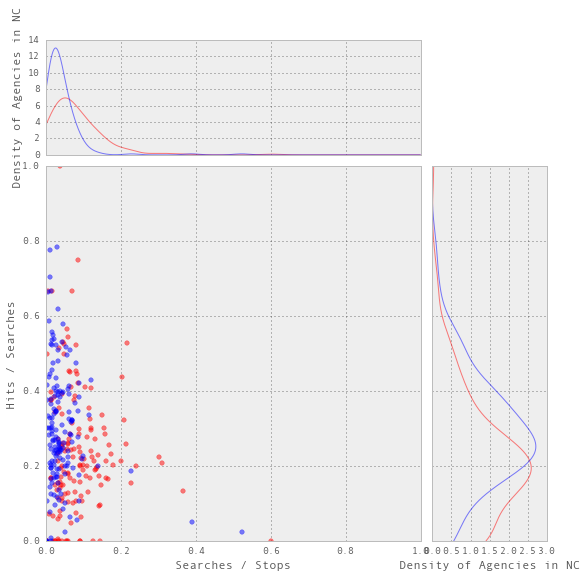

In [5]:
import numpy
from scipy import stats
# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

alpha = .5

hits = {}
hits['black'] = ratios['hits_over_searches_black'].values
hits['white'] = ratios['hits_over_searches_white'].values
searches = {}
searches['black'] = ratios['searches_over_stops_black'].values
searches['white'] = ratios['searches_over_stops_white'].values
axScatter.set_ylabel('Hits / Searches')
axScatter.set_xlabel('Searches / Stops')
black = axScatter.scatter(searches['black'],hits['black'],color='r',alpha=alpha,label='Black Drivers')
white = axScatter.scatter(searches['white'],hits['white'],color='b',alpha=alpha,label='White Drivers')

#plt.legend([black,white])




# now determine nice limits by hand:
ylim = [0,1]
xlim = [0,1]
axScatter.set_xlim(xlim)
axScatter.set_ylim(ylim)
xbinwidth = 0.025
ybinwidth = .025
binsx = np.arange(xlim[0], xlim[1] + xbinwidth, xbinwidth)
binsy = np.arange(ylim[0], ylim[1] + ybinwidth, ybinwidth)
print binsy
density_hits = {}
density_hits['black'] = stats.kde.gaussian_kde(hits['black'])
density_hits['white'] = stats.kde.gaussian_kde(hits['white'])
density_searches = {}
density_searches['black'] = stats.kde.gaussian_kde(searches['black'])
density_searches['white'] = stats.kde.gaussian_kde(searches['white'])

x = numpy.arange(xlim[0],xlim[1], .001)

y = numpy.arange(ylim[0],ylim[1], .001)
axHisty.plot(density_hits['black'](y),y,color='r',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHisty.plot(density_hits['white'](y),y,color='b',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHistx.plot(x,density_searches['black'](x),color='r',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHistx.plot(x,density_searches['white'](x),color='b',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')

#axHisty.hist(hits['black'], bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
#axHisty.hist(hits['white'], bins=binsy,facecolor='b',alpha=alpha,edgecolor='b',orientation='horizontal',histtype='step')
#axHistx.hist(searches['black'], bins=binsx,facecolor='r',alpha=alpha,edgecolor='r',histtype='step')
#axHistx.hist(searches['white'], bins=binsx,facecolor='b',alpha=alpha,edgecolor='b',histtype='step')


axHistx.set_xlim(axScatter.get_xlim())
#axHistx.set_ylim([0,40])
axHistx.set_ylabel('Density of Agencies in NC')

axHisty.set_ylim(axScatter.get_ylim())
#axHisty.set_xlim([0,50])
#axHisty.set_xlabel('Agencies in NC')
axHisty.set_xlabel('Density of Agencies in NC')
plt.savefig('images/hits_vs_searches_scatter_density.png')

plt.show()